In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# calculating dimentions of data
df.shape

(1338, 7)

In [4]:
# describe will show only numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# describe for object columns
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot: >

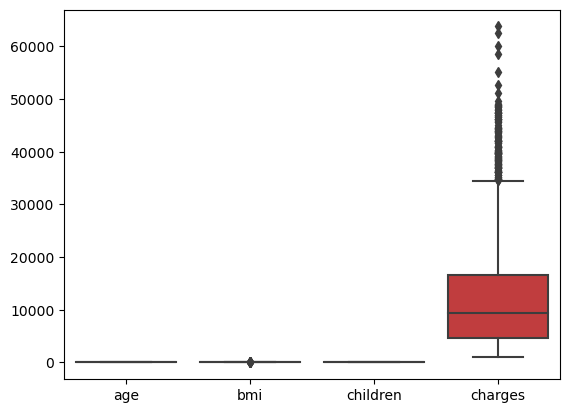

In [8]:
# checking outliers
sns.boxplot(df)

<AxesSubplot: >

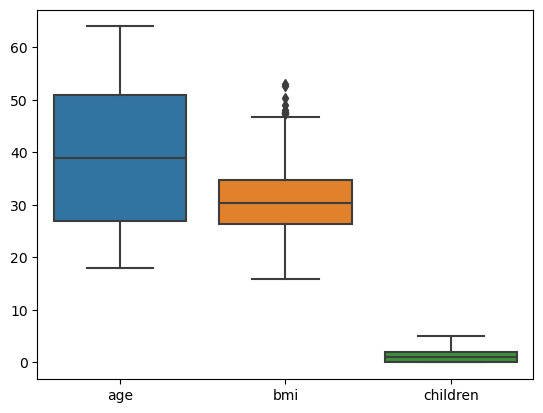

In [9]:
sns.boxplot(df[['age','bmi','children']])

In [10]:
# we can use iqr or z score method to treat outliers
# for now keeping as it is

# EDA

In [11]:
# Each variable vs target

<AxesSubplot: xlabel='sex', ylabel='count'>

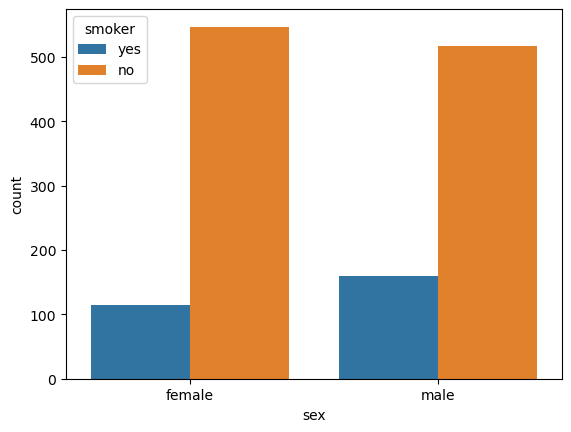

In [12]:
sns.countplot(data=df,x='sex',hue='smoker')   # both x and hue must be categorical   # hue is small box

<AxesSubplot: xlabel='count', ylabel='sex'>

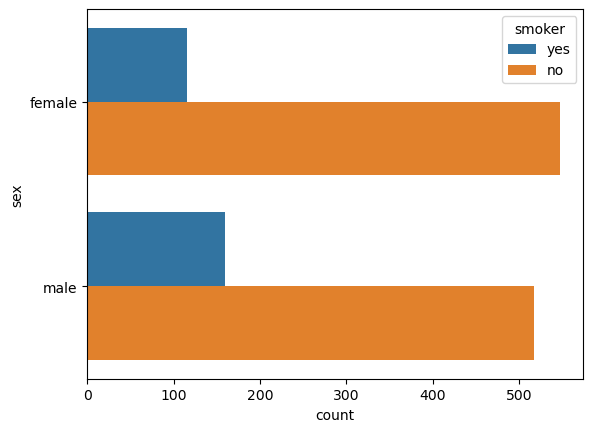

In [13]:
sns.countplot(data=df,y='sex',hue='smoker')  # for horizontal plot give in y

In [14]:
# both male and female have less smokers

<AxesSubplot: xlabel='region', ylabel='count'>

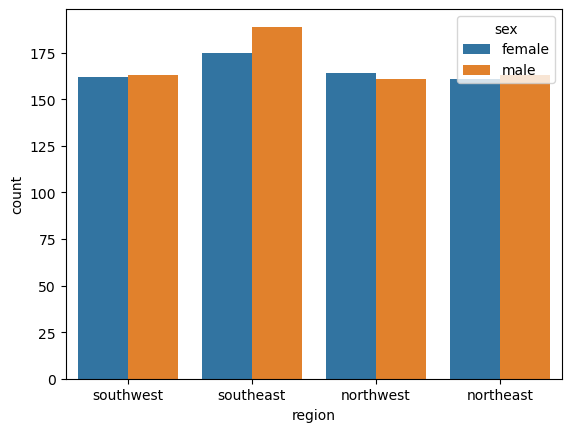

In [15]:
sns.countplot(data=df,x='region',hue='sex')  

In [16]:
# all regions are similar male female ratio

<AxesSubplot: xlabel='region', ylabel='count'>

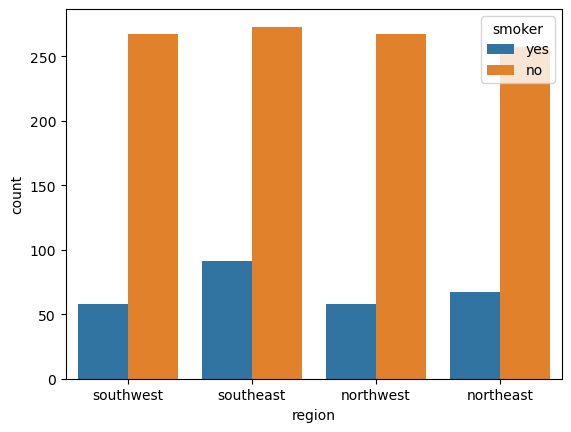

In [17]:
sns.countplot(data=df,x='region',hue='smoker')  

In [18]:
# southeast has more smokers

<AxesSubplot: xlabel='children', ylabel='count'>

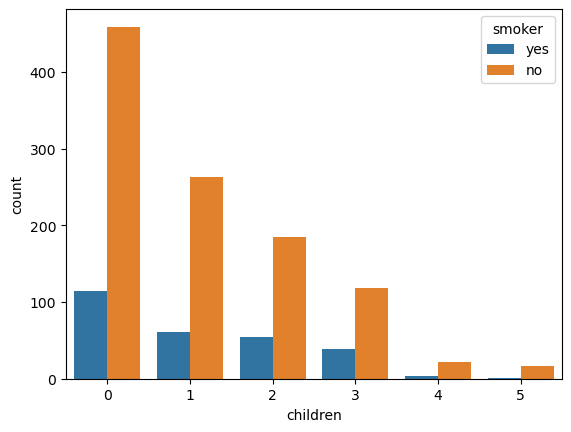

In [19]:
sns.countplot(data=df,x='children',hue='smoker')  

<AxesSubplot: xlabel='bmi', ylabel='age'>

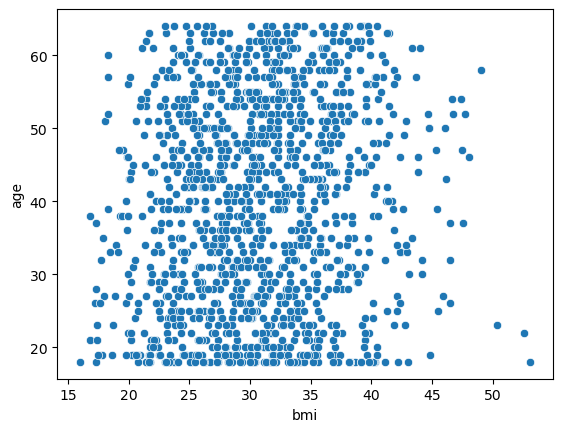

In [20]:
sns.scatterplot(data=df,x='bmi',y='age')

In [21]:
# no relation between age and bmi

<AxesSubplot: >

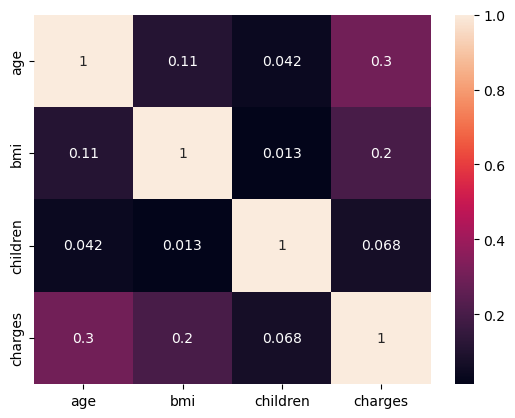

In [22]:
sns.heatmap(df.corr(),annot=True)    # annot will show percentage

In [23]:
# age and bmi has some correlation with charges

<AxesSubplot: xlabel='age', ylabel='Count'>

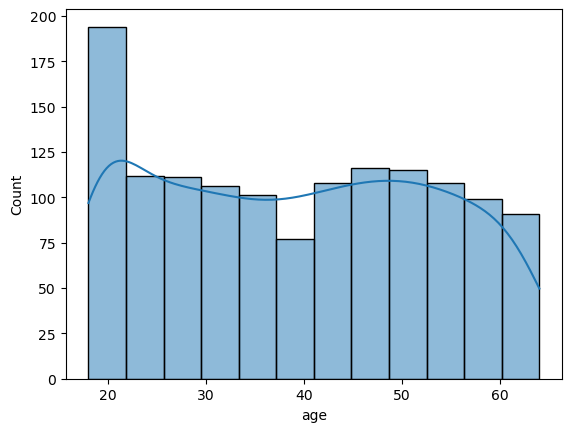

In [24]:
sns.histplot(df.age,kde=True)          # kde will show distribution

<AxesSubplot: xlabel='charges', ylabel='Count'>

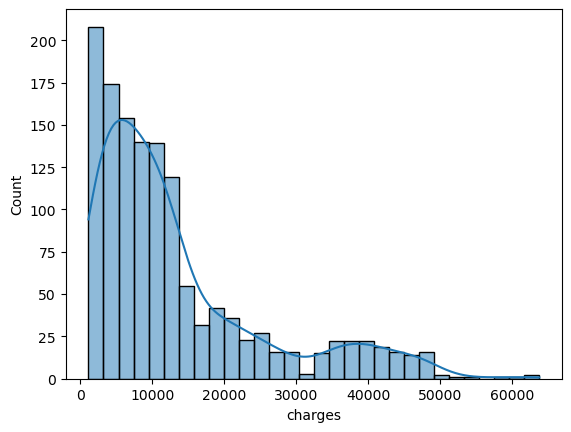

In [25]:
sns.histplot(df.charges,kde=True)

In [26]:
# target column charges is left skewed

# Feature transformation

In [27]:
# dummy encoding for categorical variables
# drop first will delete original record
# get_dummies will remove one category to avoid multicollinarity
df_new=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
df_new.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Linear regression model

In [28]:
# assumptions before running the model
# 1. target column must be normal
# 2. there should be no multicollinirity between independent variables , condition number and vif score

### OLS

In [29]:
# OLS will predict for each row and then calculate error for each row 
# then it will do sum of  squared errors of all records
# The ordinary least square method is used to find the best fit line for given data
# This method aims at minimizing the sum of squares of the error terms, that is, it determines
# those values of β 0 and β 1 at which the error terms are minimum

In [30]:
import statsmodels.api as sm

In [31]:
X=df_new.drop('charges',axis=1)
X=sm.add_constant(X)
y=df_new.charges

In [32]:
# y = β0 + β 1 x + ε   B1,B2 are independent variables , y is dependent , B0 is constant we added in previous step , e is error

In [33]:
# Most regression models include a constant term (i.e., an "intercept"), since this ensures that the model will be unbiased,
# in other words, the mean of the residuals will be zero. By including a constant, one degree of freedom for error will be lost,
# but it's a small price to pay for the protection against bias.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=11)

In [36]:
print('X train size: ',X_train.shape)
print('X test size: ',X_test.shape)
print('y train size: ',y_train.shape)
print('y test size: ',y_test.shape)

X train size:  (936, 9)
X test size:  (402, 9)
y train size:  (936,)
y test size:  (402,)


In [37]:
model=sm.OLS(y_train,X_train).fit()

In [38]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     336.8
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          3.66e-268
Time:                        14:15:19   Log-Likelihood:                -9498.5
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     927   BIC:                         1.906e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.26e+04   1214.990  

In [39]:
# assumptions after running the model
# 3. there should be linear relationship between dependent and independent variables.
#    if scatter plot residuals vs independent variables show no pattern then relationship is linear
# 4. absence of autocorrelation , residuals should not be correlated , durbin watson test
# 5. residuals should be homoscadastic i.e. they should have same variance, goldfeld quadant test , bruish pagan test
# 6. residuals must follow normal distribution , qq plot , jarque bera, shapiro wilk

In [40]:
predicted_claim=model.predict(X_test)
actual_claim=y_test

In [41]:
from statsmodels.tools.eval_measures import rmse
rmse=rmse(actual_claim,predicted_claim)
rsquared=model.rsquared
adjrsquared=model.rsquared_adj

In [42]:
score_card = pd.DataFrame(columns=['Model_Name','R-Squared','Adj. R-Squared','RMSE'])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [43]:
model = pd.Series({
                        'Model_Name' : 'Linreg(OLS) full model',
                        'RMSE' : rmse,
                        'R-Squared' : rsquared,
                        'Adj. R-Squared' : adjrsquared
})

score_card =pd.concat([score_card,model.to_frame().T])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781


In [44]:
# lets try with significant models

In [45]:
X=df_new[['smoker_yes','children','bmi','age']]
X=sm.add_constant(X)
y=df_new.charges

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [47]:
model1=sm.OLS(y_train,X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     775.9
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          1.29e-294
Time:                        14:15:19   Log-Likelihood:                -9458.6
No. Observations:                 936   AIC:                         1.893e+04
Df Residuals:                     931   BIC:                         1.895e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.276e+04   1101.895    -11.578      0.0

In [48]:
predicted_claim=model1.predict(X_test)
actual_claim=y_test

In [49]:
from statsmodels.tools.eval_measures import rmse
rmse=rmse(actual_claim,predicted_claim)
rsquared=model1.rsquared
adjrsquared=model1.rsquared_adj

In [50]:
model = pd.Series({
                        'Model_Name' : 'Linreg(OLS) with significant variables',
                        'RMSE' : rmse,
                        'R-Squared' : rsquared,
                        'Adj. R-Squared' : adjrsquared
})

score_card =pd.concat([score_card,model.to_frame().T])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
0,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546


# Feature selection

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Forward selection

This method **considers the null model (model with no predictors) in the first step.** In the next steps start adding one variable at each step until we run out of the independent variables or the stopping rule is achieved.

The variable is added based on its correlation with the target variable. Such a variable has **the least p-value** in the model.

In [52]:
X=df_new.drop('charges',axis=1)
y=df_new.charges

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=13)

In [54]:
# we can select no of features, give range for no. of features or ask it to find best features
linreg=LinearRegression()

linreg_forward = sfs(estimator=linreg, k_features = 'best', forward=True,
                     verbose=0, scoring='r2')
sfs_forward = linreg_forward.fit(X_train, y_train)

In [55]:
print(sfs_forward.k_feature_names_)
print('\nR-Squared: ', sfs_forward.k_score_)

('age', 'bmi', 'children', 'smoker_yes')

R-Squared:  0.7301152100611837


In [56]:
pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.5714761947694855, 0.49898308952919956, 0.65...",0.590763,"(smoker_yes,)",0.069829,0.054329,0.027165
2,"(0, 4)","[0.6952071990722906, 0.6503225811835638, 0.719...",0.700379,"(age, smoker_yes)",0.034266,0.02666,0.01333
3,"(0, 1, 4)","[0.7201417762871528, 0.6856290810998507, 0.753...",0.729264,"(age, bmi, smoker_yes)",0.032669,0.025417,0.012709
4,"(0, 1, 2, 4)","[0.7253608220596796, 0.6772036816652839, 0.757...",0.730115,"(age, bmi, children, smoker_yes)",0.037761,0.02938,0.01469
5,"(0, 1, 2, 4, 6)","[0.7238441204646787, 0.6769555594011879, 0.757...",0.730046,"(age, bmi, children, smoker_yes, region_southe...",0.038157,0.029687,0.014844
6,"(0, 1, 2, 4, 6, 7)","[0.7238782512520548, 0.6771661629594481, 0.757...",0.729865,"(age, bmi, children, smoker_yes, region_southe...",0.037831,0.029434,0.014717
7,"(0, 1, 2, 4, 5, 6, 7)","[0.7239222833436947, 0.6771987387414071, 0.756...",0.729577,"(age, bmi, children, smoker_yes, region_northw...",0.037438,0.029128,0.014564
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7232373130047063, 0.6769560422897803, 0.756...",0.729032,"(age, bmi, children, sex_male, smoker_yes, reg...",0.037286,0.02901,0.014505


## Backward selection

This method considers the **full model (model with all the predictors) in the first step.** In the next steps start removing one variable at each step until we run out of the independent variables or the stopping rule is achieved.

The least significant variable (with the **highest p-value**) is removed at each step.

In [57]:
# for backward forward is false
linreg_backward = sfs(estimator=linreg, k_features = 'best', forward=False,
                     verbose=0, scoring='r2')
sfs_backward = linreg_backward.fit(X_train, y_train)

In [58]:
print(sfs_backward.k_feature_names_)
print('\nR-Squared: ', sfs_backward.k_score_)

('age', 'bmi', 'children', 'smoker_yes')

R-Squared:  0.7301152100611837


In [59]:
pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7232373130047063, 0.6769560422897803, 0.756...",0.729032,"(age, bmi, children, sex_male, smoker_yes, reg...",0.037286,0.02901,0.014505
7,"(0, 1, 2, 4, 5, 6, 7)","[0.7239222833436947, 0.6771987387414071, 0.756...",0.729577,"(age, bmi, children, smoker_yes, region_northw...",0.037438,0.029128,0.014564
6,"(0, 1, 2, 4, 6, 7)","[0.7238782512520548, 0.6771661629594481, 0.757...",0.729865,"(age, bmi, children, smoker_yes, region_southe...",0.037831,0.029434,0.014717
5,"(0, 1, 2, 4, 6)","[0.7238441204646787, 0.6769555594011879, 0.757...",0.730046,"(age, bmi, children, smoker_yes, region_southe...",0.038157,0.029687,0.014844
4,"(0, 1, 2, 4)","[0.7253608220596796, 0.6772036816652839, 0.757...",0.730115,"(age, bmi, children, smoker_yes)",0.037761,0.02938,0.01469
3,"(0, 1, 4)","[0.7201417762871528, 0.6856290810998507, 0.753...",0.729264,"(age, bmi, smoker_yes)",0.032669,0.025417,0.012709
2,"(0, 4)","[0.6952071990722906, 0.6503225811835638, 0.719...",0.700379,"(age, smoker_yes)",0.034266,0.02666,0.01333
1,"(4,)","[0.5714761947694855, 0.49898308952919956, 0.65...",0.590763,"(smoker_yes,)",0.069829,0.054329,0.027165


## Recursive feature selection

Recursive feature selection considers **full model in the first step.** Then it creates **feature subsets.** Then it obtain the feature importance of each subset. Then it ranks it and **starts removing least important subset** untill selection criteria meets.

In [60]:
linreg_rfe = LinearRegression()

rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 4)

rfe_model = rfe_model.fit(X_train, y_train)

In [61]:
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 


signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['bmi', 'children', 'smoker_yes', 'region_southeast'], dtype='object')


# K Fold cross validation

Entire dataset will divided into k subsets and each subset will be used as testing subset

In [62]:
# cv=5 means it will divide dataset into 5 subsets
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [63]:
print('All scores: ', scores)

All scores:  [0.72323731 0.67695604 0.75635824 0.73314145 0.7554671 ]


# Gradient descent

In [64]:
# Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data.

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

Or better yet: use a pipeline!
from sklearn.pipeline import make_pipeline
est = make_pipeline(StandardScaler(), SGDClassifier())
est.fit(X_train)
est.predict(X_test)

In [66]:
from sklearn.linear_model import SGDRegressor
    
linreg_with_SGD=SGDRegressor()

linreg_with_SGD=linreg_with_SGD.fit(X_train,y_train)

In [67]:
predicted_claim=linreg_with_SGD.predict(X_test)
actual_claim=y_test

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linreg_SGD_mse=mean_squared_error(actual_claim,predicted_claim)

rmse=np.sqrt(linreg_SGD_mse)

rsquared=r2_score(actual_claim,predicted_claim)

adjrsquared=1-(1-rsquared)*(len(actual_claim)-1)/(len(actual_claim)-X_test.shape[1]-1)

In [69]:
model = pd.Series({
                        'Model_Name' : 'SGD ',
                        'RMSE' : rmse,
                        'R-Squared' : rsquared,
                        'Adj. R-Squared' : adjrsquared
})

score_card =pd.concat([score_card,model.to_frame().T])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
0,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
0,SGD,0.767523,0.762791,5833.668357


# Grid search CV for cross validation

In [70]:
from sklearn.model_selection import GridSearchCV

for sgd classifier

loss="hinge": (soft-margin) linear Support Vector Machine,

loss="modified_huber": smoothed hinge loss,

loss="log_loss": logistic regression

for sgd regressor

loss="squared_error": Ordinary least squares,

loss="huber": Huber loss for robust regression,

loss="epsilon_insensitive": linear Support Vector Regression

If we take learning rate constant, we can supply learning rate to alpha

In [71]:
param_grid={'alpha':10.0** ~np.arange(1,7),
            'loss':['squared_error'],
            'penalty':['l2','l1','elasticnet'],
            'learning_rate':['constant','optimal','invscaling']
    
}

reg=GridSearchCV(linreg_with_SGD,param_grid)
reg.fit(X_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_error'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [72]:
print('best alpha',reg.best_estimator_.alpha)
print('best tol',reg.best_estimator_.tol)
print('best eta0:',reg.best_estimator_.eta0)
print('best learning rate',reg.best_estimator_.learning_rate)

best alpha 1e-05
best tol 0.001
best eta0: 0.01
best learning rate invscaling


In [73]:
linreg_SGD_using_best_parameter=SGDRegressor(alpha=0.0001,
                                            tol=0.001,
                                            eta0=0.01,
                                            learning_rate='constant')

linreg_SGD_using_best_parameter.fit(X_train,y_train)

SGDRegressor(learning_rate='constant')

In [74]:
predicted_claim=linreg_SGD_using_best_parameter.predict(X_test)
actual_claim=y_test

In [75]:
linreg_SGD_mse=mean_squared_error(actual_claim,predicted_claim)

rmse=np.sqrt(linreg_SGD_mse)

rsquared=r2_score(actual_claim,predicted_claim)

adjrsquared=1-(1-rsquared)*(len(actual_claim)-1)/(len(actual_claim)-X_test.shape[1]-1)

In [76]:
model = pd.Series({
                        'Model_Name' : 'SGD with grid search cv ',
                        'RMSE' : rmse,
                        'R-Squared' : rsquared,
                        'Adj. R-Squared' : adjrsquared
})

score_card =pd.concat([score_card,model.to_frame().T])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
0,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
0,SGD,0.767523,0.762791,5833.668357
0,SGD with grid search cv,0.767228,0.762489,5837.378254


# Ridge regularisation

In [77]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [78]:
# aplha 0 means have more leniency and 1 means strict 
# alpha is regularisation parameter
ridge = Ridge(alpha= 1,max_iter=500)

ridge.fit(X_train,y_train)

Ridge(alpha=1, max_iter=500)

In [79]:
predicted_charges = ridge.predict(X_test)

actual_charges=y_test

In [80]:
ridge_mse =mean_squared_error(y_test,predicted_charges)

ridge_rmse=np.sqrt(ridge_mse)

ridge_r2=r2_score(y_test,predicted_charges)

ridge_adjr2= 1-(1-ridge_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [81]:
ridge_model_Score = pd.Series({
                                        'Model_Name' : 'ridge_model_with_aplha_1',
                                        'RMSE' : ridge_rmse,
                                        'R-Squared' : ridge_r2,
                                        'Adj. R-Squared' : ridge_adjr2
})

score_card =score_card.append(ridge_model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\1269423264.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(ridge_model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833


# Grid search cv for ridge

In [82]:
tuned_parameters =[{'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,0.1,1,5,10,20,40,60,80,100]}]

ridge = Ridge()

ridge_grid=GridSearchCV(estimator=ridge,
                       param_grid=tuned_parameters,
                       cv=10)

ridge_grid.fit(X_train,y_train)

print('best parameters', ridge_grid.best_params_,'\n')

best parameters {'alpha': 20} 



In [83]:
ridge = Ridge(alpha= 20,max_iter=500)

ridge.fit(X_train,y_train)

Ridge(alpha=20, max_iter=500)

In [84]:
predicted_charges = ridge.predict(X_test)

actual_charges=y_test

In [85]:
ridge_mse =mean_squared_error(y_test,predicted_charges)

ridge_rmse=np.sqrt(ridge_mse)

ridge_r2=r2_score(y_test,predicted_charges)

ridge_adjr2= 1-(1-ridge_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [86]:
ridge_model_Score = pd.Series({
                                        'Model_Name' : 'ridge with grid search cv',
                                        'RMSE' : ridge_rmse,
                                        'R-Squared' : ridge_r2,
                                        'Adj. R-Squared' : ridge_adjr2
})

score_card =score_card.append(ridge_model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\805932047.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(ridge_model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524


# Lasso regularisation

In [87]:
lasso =Lasso(alpha=0.1 , max_iter = 500)

lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=500)

In [88]:
predicted_charges = lasso.predict(X_test)

actual_charges=y_test

In [89]:
lasso_mse =mean_squared_error(y_test,predicted_charges)
lasso_rmse=np.sqrt(lasso_mse)
lasso_r2=r2_score(y_test,predicted_charges)

lasso_adjr2= 1-(1-lasso_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [90]:
lasso_model_Score = pd.Series({
                                        'Model_Name' : 'lasso_model_with_aplha_0.1',
                                        'RMSE' : lasso_rmse,
                                        'R-Squared' : lasso_r2,
                                        'Adj. R-Squared' : lasso_adjr2
})

score_card =score_card.append(lasso_model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\534856886.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(lasso_model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391


# Grid search cv for lasso

In [91]:
tuned_parameters =[{'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,0.1,1,5,10,20,40,60,80,100]}]

lasso = Lasso(max_iter = 500)

lasso_grid=GridSearchCV(estimator=lasso,
                       param_grid=tuned_parameters,
                       cv=10)

lasso_grid.fit(X_train,y_train)

print('best parameters', lasso_grid.best_params_,'\n')

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+10, tolerance: 1.233e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.634e+10, tolerance: 1.268e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+10, toleranc

best parameters {'alpha': 100} 



In [92]:
lasso =Lasso(alpha=100 , max_iter = 500)

lasso.fit(X_train,y_train)    

Lasso(alpha=100, max_iter=500)

In [93]:
predicted_charges = lasso.predict(X_test)

actual_charges=y_test

In [94]:
lasso_mse =mean_squared_error(y_test,predicted_charges)
lasso_rmse=np.sqrt(lasso_mse)
lasso_r2=r2_score(y_test,predicted_charges)

lasso_adjr2= 1-(1-lasso_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [95]:
lasso_model_Score = pd.Series({
                                        'Model_Name' : 'lasso_model_with_Grid search',
                                        'RMSE' : lasso_rmse,
                                        'R-Squared' : lasso_r2,
                                        'Adj. R-Squared' : lasso_adjr2
})

score_card =score_card.append(lasso_model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\3046778075.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(lasso_model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391
7,lasso_model_with_Grid search,0.766755,0.762007,5843.294967


# Elasticnet regularisation

In [96]:
# it uses some part of ridge and some part of lasso
# l1 refers to lasso
#l2 refers to ridge
# l1 ratio describes part of lasso

In [97]:
enet = ElasticNet(alpha=0.1,l1_ratio=0.01,max_iter=500)

enet.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)

In [98]:
predicted_charges = enet.predict(X_test)

actual_charges=y_test

In [99]:
enet_mse =mean_squared_error(y_test,predicted_charges)
enet_rmse=np.sqrt(enet_mse)
enet_r2=r2_score(y_test,predicted_charges)

enet_adjr2= 1-(1-enet_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [100]:
enet_model_Score = pd.Series({
                                        'Model_Name' : 'enet_model',
                                        'RMSE' : enet_rmse,
                                        'R-Squared' : enet_r2,
                                        'Adj. R-Squared' : enet_adjr2
})

score_card =score_card.append(enet_model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\3304645261.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(enet_model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391
7,lasso_model_with_Grid search,0.766755,0.762007,5843.294967
8,enet_model,0.760303,0.755423,5923.570271


# KNN

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [102]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [103]:
predicted_charges = model.predict(X_test)

actual_charges=y_test

In [104]:
mse =mean_squared_error(actual_charges,predicted_charges)
rmse=np.sqrt(mse)
r2=r2_score(actual_charges,predicted_charges)

adjr2= 1-(1-r2)*(len(actual_charges)-1)/(len(actual_charges)-X_test.shape[1]-1)

In [105]:
model_Score = pd.Series({
                                        'Model_Name' : 'KNN',
                                        'RMSE' : rmse,
                                        'R-Squared' : r2,
                                        'Adj. R-Squared' : adjr2
})

score_card =score_card.append(model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\2091733928.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391
7,lasso_model_with_Grid search,0.766755,0.762007,5843.294967
8,enet_model,0.760303,0.755423,5923.570271
9,KNN,0.822386,0.818771,5099.059748


#  Grid search cv for knn

In [106]:
tuning_parameters = {'n_neighbors': np.arange(1, 25, 2),                              # neighbours must be odd numbers
                   'metric': ['hamming','euclidean','cityblock','chebyshev']}         # cityblock - manhatten        

model = KNeighborsRegressor()

grid = GridSearchCV(estimator = model, 
                        param_grid = tuning_parameters, 
                        cv = 10, 
                        scoring = 'neg_mean_absolute_error')

grid.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'metric': 'chebyshev', 'n_neighbors': 3}
accuracy : -3692.3187536531004


In [107]:
model = KNeighborsRegressor(n_neighbors=3,metric='chebyshev')
model.fit(X_train, y_train)

KNeighborsRegressor(metric='chebyshev', n_neighbors=3)

In [108]:
predicted_charges = model.predict(X_test)

actual_charges=y_test

In [109]:
mse =mean_squared_error(actual_charges,predicted_charges)
rmse=np.sqrt(mse)
r2=r2_score(actual_charges,predicted_charges)

adjr2= 1-(1-r2)*(len(actual_charges)-1)/(len(actual_charges)-X_test.shape[1]-1)

In [110]:
model_Score = pd.Series({
                                        'Model_Name' : 'KNN by grid search cv',
                                        'RMSE' : rmse,
                                        'R-Squared' : r2,
                                        'Adj. R-Squared' : adjr2
})

score_card =score_card.append(model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\2835153258.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391
7,lasso_model_with_Grid search,0.766755,0.762007,5843.294967
8,enet_model,0.760303,0.755423,5923.570271
9,KNN,0.822386,0.818771,5099.059748


# Decision tree

In [111]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [112]:
from sklearn import tree

In [113]:
predicted_charges = model.predict(X_test)

actual_charges=y_test

In [114]:
mse =mean_squared_error(actual_charges,predicted_charges)
rmse=np.sqrt(mse)
r2=r2_score(actual_charges,predicted_charges)

adjr2= 1-(1-r2)*(len(actual_charges)-1)/(len(actual_charges)-X_test.shape[1]-1)

In [115]:
model_Score = pd.Series({
                                        'Model_Name' : 'Decision tree',
                                        'RMSE' : rmse,
                                        'R-Squared' : r2,
                                        'Adj. R-Squared' : adjr2
})

score_card =score_card.append(model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\3052980828.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391
7,lasso_model_with_Grid search,0.766755,0.762007,5843.294967
8,enet_model,0.760303,0.755423,5923.570271
9,KNN,0.822386,0.818771,5099.059748


# Grid search cv for decision tree

In [116]:
from sklearn.model_selection import GridSearchCV

tuning_parameters = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'], 
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}     

model = DecisionTreeRegressor()

grid = GridSearchCV(estimator = model, 
                        param_grid = tuning_parameters, 
                        cv = 10, 
                        scoring = 'neg_mean_absolute_error')

grid.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}
accuracy : -4069.422315168733


In [117]:
model = DecisionTreeRegressor(criterion= 'squared_error', 
                              max_depth= 5, 
                              max_features= 'log2',
                              max_leaf_nodes= 8,
                              min_samples_leaf= 5, 
                              min_samples_split= 5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=8,
                      min_samples_leaf=5, min_samples_split=5)

In [118]:
predicted_charges = model.predict(X_test)

actual_charges=y_test

In [119]:
mse =mean_squared_error(actual_charges,predicted_charges)
rmse=np.sqrt(mse)
r2=r2_score(actual_charges,predicted_charges)

adjr2= 1-(1-r2)*(len(actual_charges)-1)/(len(actual_charges)-X_test.shape[1]-1)

In [120]:
model_Score = pd.Series({
                                        'Model_Name' : 'Decision tree Grid search CV',
                                        'RMSE' : rmse,
                                        'R-Squared' : r2,
                                        'Adj. R-Squared' : adjr2
})

score_card =score_card.append(model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\3950794324.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391
7,lasso_model_with_Grid search,0.766755,0.762007,5843.294967
8,enet_model,0.760303,0.755423,5923.570271
9,KNN,0.822386,0.818771,5099.059748


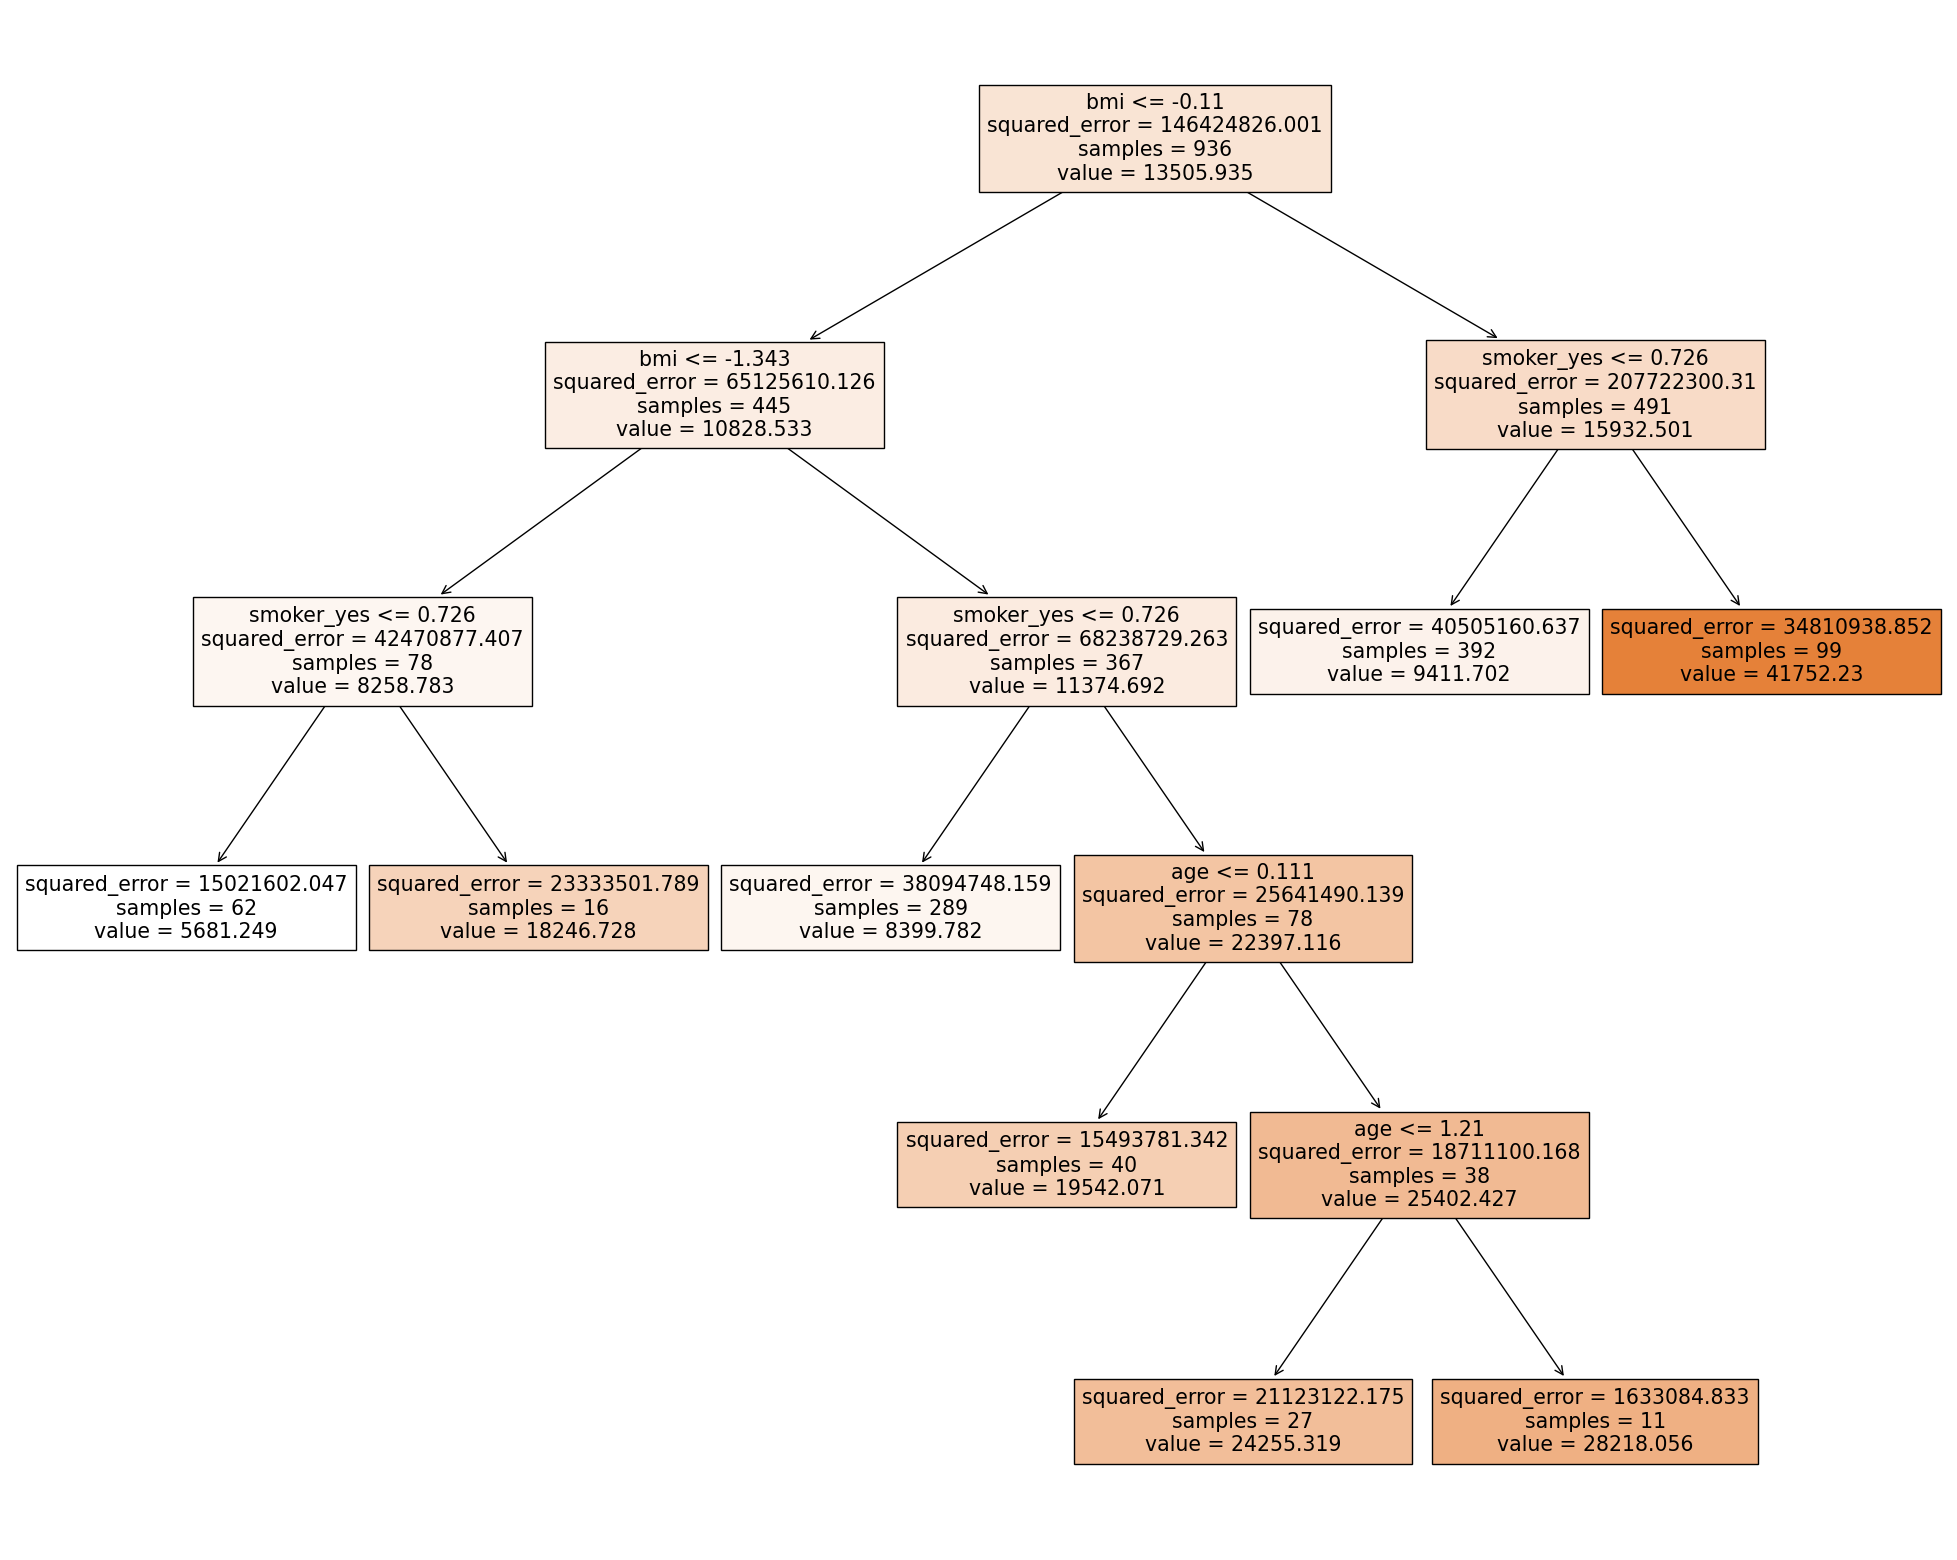

In [121]:
feature_names = X.columns
target_names = y.name

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)


# Random forest regression

In [133]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [134]:
predicted_charges = model.predict(X_test)

actual_charges=y_test

In [135]:
mse =mean_squared_error(actual_charges,predicted_charges)
rmse=np.sqrt(mse)
r2=r2_score(actual_charges,predicted_charges)

adjr2= 1-(1-r2)*(len(actual_charges)-1)/(len(actual_charges)-X_test.shape[1]-1)

In [125]:
model_Score = pd.Series({
                                        'Model_Name' : 'Random forest',
                                        'RMSE' : rmse,
                                        'R-Squared' : r2,
                                        'Adj. R-Squared' : adjr2
})

score_card =score_card.append(model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\959283316.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391
7,lasso_model_with_Grid search,0.766755,0.762007,5843.294967
8,enet_model,0.760303,0.755423,5923.570271
9,KNN,0.822386,0.818771,5099.059748


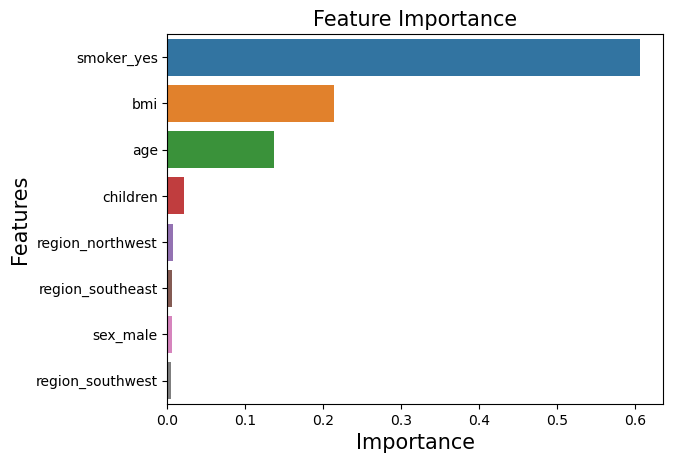

In [136]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X.columns, 
                                   'Importance': model.feature_importances_})


# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [126]:
from sklearn.model_selection import GridSearchCV

tuning_parameters = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}     

model = RandomForestRegressor()

grid = GridSearchCV(estimator = model, 
                        param_grid = tuning_parameters, 
                        cv = 10, 
                        scoring = 'neg_mean_absolute_error')

grid.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

KeyboardInterrupt: 

# XG Boost

In [127]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth = 10, gamma = 1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [128]:
predicted_charges = model.predict(X_test)

actual_charges=y_test

In [129]:
mse =mean_squared_error(actual_charges,predicted_charges)
rmse=np.sqrt(mse)
r2=r2_score(actual_charges,predicted_charges)

adjr2= 1-(1-r2)*(len(actual_charges)-1)/(len(actual_charges)-X_test.shape[1]-1)

In [130]:
model_Score = pd.Series({
                                        'Model_Name' : 'XGB',
                                        'RMSE' : rmse,
                                        'R-Squared' : r2,
                                        'Adj. R-Squared' : adjr2
})

score_card =score_card.append(model_Score,ignore_index=True)
score_card

C:\Users\rohan\AppData\Local\Temp\ipykernel_13120\3758749830.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card =score_card.append(model_Score,ignore_index=True)


,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg(OLS) full model,0.743996,0.741787,5729.713781
1,Linreg(OLS) with significant variables,0.769237,0.768245,6376.090546
2,SGD,0.767523,0.762791,5833.668357
3,SGD with grid search cv,0.767228,0.762489,5837.378254
4,ridge_model_with_aplha_1,0.767475,0.762742,5834.274833
5,ridge with grid search cv,0.766941,0.762197,5840.969524
6,lasso_model_with_aplha_0.1,0.767485,0.762751,5834.15391
7,lasso_model_with_Grid search,0.766755,0.762007,5843.294967
8,enet_model,0.760303,0.755423,5923.570271
9,KNN,0.822386,0.818771,5099.059748


In [ ]:
# XGB grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],          # eta
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}                                 # gamma

model = XGBRegressor()                                                         # reg alpha l1 regularisation

grid = GridSearchCV(estimator = model,                                          # reg lambda l2 regularisation
                        param_grid = tuning_parameters, 
                        cv = 10, 
                        scoring = 'neg_mean_absolute_error')

grid.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

# Hyperparameters information

## KNN

In [ ]:
""""
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
""""

## Decision tree

In [ ]:
""""
tuned_paramaters = [{'criterion': ['entropy'], 
                     'max_depth': [5,10],  
                     'max_features': ["sqrt", "log2"], 
                     'min_samples_split': [2,5,8], 
                     'min_samples_leaf': [1,5,9], 
                     'max_leaf_nodes': [5,8]}]

""""

## Random forest

In [ ]:
""""
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
                     
""""

## Ada boost

Let us understand the parameters in the `AdaBoostClassifier()`:

`algorithm=SAMME.R`: It is the default boosting algorithm. This algorithm uses predicted class probabilities to build the stumps. Concepts of Gini and Entropy use probabilities

`base_estimator=None`: By default, the estimator is a decision tree with a maximum depth equal to 1 (stump).

`learning_rate=1.0`: It considers the contribution of each estimator in the classifier. We are using Amount of Say. Learning rate is not useful in ADABoost but in GB ABD and XGB

`n_estimators=40`: It is the number of estimators at which boosting is terminated. We may not require such high value and hence kept the value low to 6

`random_state=10`: It returns the same set of samples for each code implementation.

## Gradient Boost

Let us understand the parameters in the `GradientBoostingClassifier()`:

`ccp_alpha=0.0`: The complexity parameter used for pruning. By default, there is no pruning. It helps to identify which will be the weakest link to be pruned.  It is used for post pruning. The parameter α reduces the complexity of the tree by controlling the number of leaf nodes, which eventually reduces over-fitting. **This the same parameter -Gamma**

* https://medium.com/swlh/post-pruning-decision-trees-using-python-b5d4bcda8e23#:~:text=The%20DecisionTreeClassifier%20class%20in%20sklearn%20provides%20ccp_alpha%20as,for%20effective%20alphas%2C%20i.e.%20the%20process%20of%20pruning

`criterion=friedman_mse`: The criteria to measure the quality of a split. it is used to reduce node impurity. This is similar to variance based method to find the Information Gain

`init=None`: The estimator for initial predictions.

`learning_rate=0.1`: It considers the contribution of each estimator in the classifier.

`loss=deviance`: The loss function to be optimized.

`max_depth=10`: Assigns the maximum depth of the tree.

`max_features=None`: Maximum features to consider for the split.

`max_leaf_nodes=None`: Maximum number of leaf/terminal nodes in the tree.

`min_impurity_decrease=0.0`: A node splits if it decreases the impurity by the value given by this parameter. similar to gamma in xgboost

`min_impurity_split=None`: Minimum value of impurity for a node to split. 

`min_samples_leaf=1`: Minimum number of samples needed at the leaf/terminal node.

`min_samples_split=2`: Minimum number of samples needed at the internal node to split. 

`min_weight_fraction_leaf=0.0`: Minimum weighted fraction needed at a leaf node.  the fraction of the input samples(classes) required to be at a leaf node where weights are determined by sample_weight, this is a way to deal with class imbalance. The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

`n_estimators=150`: The number of estimators to consider.

`n_iter_no_change=None`: Number of iterations after which the training should terminate if the score is not improving.

`presort='deprecated'`: It considers whether to presort the data. (This parameter may not be available in the latest versions). 

`random_state=10`: It returns the same set of samples for each code implementation. Used during selecting samples for crossvalidation

`subsample=1.0`: Fraction of samples to use for fitting each estimator. when it is 1 we are using complete rows. if it is 0.8 we will take a subset of 80% rows for input

`tol=0.0001`: Value of tolerance to terminate the training.

`validation_fraction=0.1`: Fraction of training dataset used for validation.

`verbose=0`: Enables verbose output (by default, no progress will be printed).

`warm_start=False`: Whether to reuse the solution of previous code implementation (by default, it does not consider the previous solution).

## XG Boost

Let us understand the parameters in the `XGBClassifier()`:

`base_score=0.5`: Initial prediction for base learners.

`booster=gbtree`: Considers the regression tree as the base learners.

`colsample_bylevel=1`: Fraction of variables/features to consider for each level. Subsample ratio of columns when constructing each tree.when the value is 1 all variables will be taken. if 0.8 80% of features will be considered at every level for tree construction

`colsample_bynode=1`: Fraction of variables to consider for each split.

`colsample_bytree=1`: Fraction of variables to consider for each tree. Subsample ratio of columns when constructing each tree. This is the subset of features that can be used instead of taking all the features

`gamma=1`: Value of minimum loss reduction required for the partition of the leaf node. This is the one which was used for pruning (Gain-Gamma)

`gpu_id=-1`: It considers all the GPU's. 

`importance_type=gain`: Importance type for calculating feature importance.

`interaction_constraints=''`: By default, no interaction between the features is allowed.

`learning_rate=0.300000012`: It considers the contribution of each estimator in the classifier.

`max_delta_step=0`: Maximum delta step allowed for each tree's weight estimation to be.

`max_depth=10`: Maximum depth of each tree.

`min_child_weight=1`: Minimum sum of hessian (p*(1-p)) required in a leaf node.  the same as cover

`missing=nan`: Value to consider as a missing value.

`monotone_constraints='()'`:  Constraint of variable monotonicity. (adding increasing/decreasing constraint on the variables )

`n_estimators=100`: The number of estimators to consider.

`n_jobs=0`: Number of parallel threads to run the classifier.

`num_parallel_tree=1`: It is used for boosting random forest.

`objective='binary:logistic'`: Considers the binary logistic regression as a learning objective.

`random_state=0`: It returns the same set of samples for each code implementation.

`reg_alpha=0`: Lasso regularization term for weights.

`reg_lambda=1`: Ridge regularization term for weights.

`scale_pos_weight=1`:  Ratio of the number of negative class to the positive class. Balancing of positive and negative weights.

`subsample=1`: Fraction of total training data points.  Subsample ratio of the training instance. 1 means all rows are taken

`tree_method='exact'`: Considers the exact greedy algorithm.

`validate_parameters=1`: Performs validation on input parameters.

`verbosity=None`: Enables verbose output (by default, no progress will be printed).

In [ ]:
""""

tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
                     
""""